# Kaggle Survey 2020 - Why you are here?

<a id="table-of-contents"></a>

**[Introduction](#Introduction)**<br>
**[Kaggle User Segmentation](#section-two)**<br>
**[Education / Technology](#section-three)**<br>
**[Money Analysis](#section-four)**<br>
**[Present and Future Technology Trends](#section-five)**<br>
**[SUMMARY](#section-six)**<br>

# **Introduction**

Why are you here? What do you need from Kaggle? What Kaggle needs from you?
Everyone has a purpose being on Kaggle, whether it is learning, technologies, information, recognition and even money. 

Let us keep it short and fun and try to break this down to small pieces. 
The goal of this notebook is to spend around 10 minutes from which 8 minutes should be charts analysis and identifying yourself in all this story, also to find some good takeaways for future.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Data reading and first column removing
sv = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
quest = sv.iloc[0, :]
sv = sv.iloc[1:, :]
sv.reset_index()
sv=sv.astype({"Time from Start to Finish (seconds)":'int64'})
sv=sv.rename(columns={"Time from Start to Finish (seconds)":"Seconds"})

#Map ISO field add for mapping purpose
listc=[['Argentina','ARG'],	['Australia','AUS'],	['Bangladesh','BGD'],	['Belarus','BLR'],	['Belgium','BEL'],	['Brazil','BRA'],
      ['Canada','CAN'],	['Chile','CHL'],	['China','CHN'],	['Colombia','COL'],	['Egypt','EGY'],	['France','FRA'],	['Germany','DEU'],	
      ['Ghana','GHA'],	['Greece','GRC'],	['India','IND'],	['Indonesia','IDN'],	['Iran, Islamic Republic of...','IRN'],	['Ireland','IRL'],
      ['Israel','ISR'],	['Italy','ITA'],	['Japan','JPN'],	['Kenya','KEN'],	['Malaysia','MYS'],	['Mexico','MEX'],	['Morocco','MAR'],
      ['Nepal','NPL'],	['Netherlands','NLD'],	['Nigeria','NGA'],	['Other','Other'],	['Pakistan','PAK'],	['Peru','PER'],	['Philippines','PHL'],
      ['Poland','POL'],	['Portugal','PRT'],	['Republic of Korea','PRK'],	['Romania','ROU'],	['Russia','RUS'],	['Saudi Arabia','SAU'],	
      ['Singapore','SGP'],	['South Africa','ZAF'],	['South Korea','KOR'],	['Spain','ESP'],	['Sri Lanka','LKA'],	['Sweden','SWE'],	
      ['Switzerland','CHE'],	['Taiwan','TWN'],	['Thailand','THA'],	['Tunisia','TUN'],	['Turkey','TUR'],	['Ukraine','UKR'],	
      ['United Arab Emirates','ARE'],	['United Kingdom of Great Britain and Northern Ireland','GBR'],	['United States of America','USA'],	
      ['Viet Nam','VNM']]
cnty = pd.DataFrame(listc, columns =['Q3', 'ISO'])
survey=sv.merge(cnty, on='Q3', how='left')
survey.loc[survey['Q3']=="United Kingdom of Great Britain and Northern Ireland", "Q3"] = "United Kingdom"
survey.loc[survey['Q4']=="Some college/university study without earning a bachelor’s degree", "Q4"] = "Some college/university"
survey.loc[survey['Q4']=="No formal education past high school", "Q4"] = "No formal education"

#Segmentation breakdown and NULL replacement
list1=[['Data Analyst','Data Enthusiasts'],	['Business Analyst','Data Enthusiasts'],	['Data Engineer','Data Enthusiasts'],	['DBA/Database Engineer','Data Enthusiasts'],	
       ['Software Engineer','Data Enthusiasts'],	['Statistician','Data Enthusiasts'],	['Product/Project Manager','Data Enthusiasts'],	['Research Scientist','Data Enthusiasts'],	
       ['Student','Student'],  ['Data Scientist','Data Scientist'],	['Machine Learning Engineer','ML Engineer'],	['Other','Data Imposters'],	['','Data Imposters'],
       ['Currently not employed','Data Imposters']]
cnty1 = pd.DataFrame(list1, columns =['Q5', 'Segm'])
survey=survey.merge(cnty1, on='Q5', how='left')
survey['Segm'].fillna("Data Imposters", inplace = True)
#Average Salary Numbers
lists=[['No Data','0'],	['100,000-124,999','112500'],	['15,000-19,999','17500'],	['125,000-149,999','137500'],	['70,000-79,999','75000'],	['30,000-39,999','35000'],	['90,000-99,999','95000'],	['1,000-1,999','1500'],	['$0-999','500'],	['10,000-14,999','12500'],	
 ['150,000-199,999','175000'],	['60,000-69,999','65000'],	['4,000-4,999','4500'],	['> $500,000','500000'],	['300,000-500,000','400000'],	['40,000-49,999','45000'],	['25,000-29,999','27500'],	
 ['80,000-89,999','85000'],	['7,500-9,999','8750'],	['50,000-59,999','55000'],	['250,000-299,999','275000'],	['5,000-7,499','6250'],	['2,000-2,999','2500'],	['20,000-24,999','22500'],	['200,000-249,999','225000'],	
 ['3,000-3,999','3500']]
salary=pd.DataFrame(lists, columns =['Q24', 'Salary'])
survey=survey.merge(salary, on='Q24', how='left')
survey['Salary'].fillna(0, inplace = True)
survey['Salary']=pd.to_numeric(survey['Salary'])
#Some Data correction
survey['Average Age'] = pd.to_numeric(survey['Q1'].str[:2], errors='coerce')+2 #Average Age
survey['Q1'].fillna("No Data", inplace = True)
survey['Q2'].fillna("No Data", inplace = True)
survey['Q3'].fillna("No Data", inplace = True)
survey['Q4'].fillna("No Data", inplace = True)
survey['Q5'].fillna("No Data", inplace = True)
survey['Q6'].fillna("No Data", inplace = True)
survey['Q8'].fillna("No Data", inplace = True)
survey['Q11'].fillna("No Data", inplace = True)
survey['Q24'].fillna("No Data", inplace = True)
survey['Q25'].fillna("No Data", inplace = True)
survey['Resp']=1

[back to top](#table-of-contents)
<a id="section-two"></a>
#  **Kaggle User Segmentation**

We identified here 5 types of Kagglers position based. 
Please click on MAP to check ALL Survey Details for that specific country!

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1609910936706' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ka&#47;KaggleSurvey2020_16095313150070&#47;MAIN&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='KaggleSurvey2020_16095313150070&#47;MAIN' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ka&#47;KaggleSurvey2020_16095313150070&#47;MAIN&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1609910936706');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='750px';vizElement.style.height='1250px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**CLICK ON THE MAP TO SEE DETAILS** 📌

Pictures source: free samples on Behance.

Tableau is amazing for data visualization but let us try to crack it down with Python.

<a>Data Imposters: </a> (Other, Currently not employed and Blanks). These are specialists who cannot identify themselves as data specialists or most probable don’t want to disclose their position. This could be: businessperson responsible for the budgets, product managers, supervisor, directors, CEO etc.

<a>Students:</a> (Students). Studying and learning are main activities.

<a>Data Enthusiasts:</a> (Data Analyst, Business Analyst, Data Engineer, DBA/Database Engineer,  Software Engineer, Statistician, Product/Project Manager, Research Scientist). These are the specialist who work on data and knowledge side, but don’t really created Data Science or Machine Learning notebooks. For example, Data Analyst may be busy with curing the data for a Data Scientist. Or a Statistician can work on a complex problem, but the model is built by a Machine Learning Engineer. Basically, they want to try themselves and see what the hell is Machine Learning, how hard is it and if it is possible to learning and get that promotion (this is where I am).

<a>Data Scientist and ML Engineers:</a> These are the next level specialists, and they are here the be recognized and continue their career as best in class.

In [ ]:
#Map countries
country=survey[["Q3", "ISO", "Resp"]]
country=country.groupby(["Q3","ISO"])["Resp"].sum().reset_index()
country.columns=['Country', 'ISO', 'Count']
fig = px.choropleth(data_frame=country,
                    locations='ISO',
                    color='Count',
                    color_continuous_scale='inferno',
                    hover_name='Country',
                    labels={'Count':'Respondents'},
                    title='Kaggle 2020 Responses by Country - MAP - Hover on country for details')
fig.show()
#Country Age and Average Salary chart
sal_country=survey[survey['Q24'] !='No Data']
sal_country=sal_country[["Q3",  "Salary","Average Age","Resp"]]
sal_country=sal_country.groupby(['Q3']).agg({'Salary':'mean', 'Average Age':'mean','Resp':'sum'}).reset_index()
sal_country=sal_country.round({'Salary': 1, 'Average Age': 1})
fig = px.scatter(sal_country, x="Salary", y="Average Age", size="Resp", color="Salary",color_continuous_scale='inferno',title='Kaggle 2020: Average Age and Salary by Country (hover for details)',
           hover_name="Q3",  size_max=40)
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
    fig.update_xaxes(showticklabels=True)
    fig.layout.showlegend = False
fig.show()

<a>**3D Chart by Country Age and Salary**</a> 

Imagine you have a transparent box with country balls with higher respondends on top and higher salary away from the corner. (Mighty Plotly Express in 1 line of code)

In [ ]:
#3D data and chart
sal_3d=survey[survey['Q24'] !='No Data']
sal_3d=sal_3d[["Q3",  "Salary","Average Age","Resp"]]
sal_3d=sal_3d.groupby(['Q3']).agg({'Salary':'mean', 'Average Age':'mean','Resp':'sum'}).reset_index()
sal_3d=sal_3d.round({'Salary': 1, 'Average Age': 1})
fig = px.scatter_3d(sal_3d, x="Average Age", y="Resp", z="Salary", color="Salary", size="Salary",hover_name="Q3", height =800,opacity=0.8,size_max=70)
fig.layout.showlegend = False
fig.show()

In [ ]:
top10list=['India',	'United States of America',	'Other', 'Brazil', 'Japan',	'Russia', 'United Kingdom',	'Nigeria', 'China', 'Germany', 'Turkey']
#Building the dataframe for SEGMENTATION
menu1=survey[["Q3", "Segm", "Resp"]]
menu=menu1[menu1["Q3"].isin(top10list)]
menu=menu.groupby(["Q3","Segm"])["Resp"].sum().reset_index()
menu.columns=["Country", "Segment", "Count"]
menu=menu.pivot(index="Segment", columns="Country", values="Count").reset_index()
menu1=menu1.groupby(["Segm"])["Resp"].sum().reset_index()
menu1.columns=["Segment", "All"]
menu=pd.merge(menu,menu1[["Segment", "All"]],on="Segment", how='left')
segmentation_bar = menu # <-- Name of the Dataframe (bar - used for a bar chart)
#Building the dataframe for AGE
menu1=survey[["Q3", "Q1", "Resp"]]
menu=menu1[menu1["Q3"].isin(top10list)]
menu=menu.groupby(["Q3","Q1"])["Resp"].sum().reset_index()
menu.columns=["Country", "Age", "Count"]
menu=menu.pivot(index="Age", columns="Country", values="Count").reset_index()
menu1=menu1.groupby(["Q1"])["Resp"].sum().reset_index()
menu1.columns=["Age", "All"]
menu=pd.merge(menu,menu1[["Age", "All"]],on="Age", how='left')
age_bar=menu
top10age=["Age", "All","India", "United States of America", "Brazil", "Japan",	"Russia", "United Kingdom",	"Nigeria", "China", "Germany", "Turkey", "Other"]
age_bar=age_bar[top10age]
age_bar=age_bar.groupby(["Age"])[top10age].sum()
#age_bar # <-- Name of the Dataframe (bar - used for a bar chart)

#Building the dataframe for Experince
menu1=survey[["Q3", "Q6", "Resp"]]
menu=menu1[menu1["Q3"].isin(top10list)]
menu=menu.groupby(["Q3","Q6"])["Resp"].sum().reset_index()
menu.columns=["Country", "Experience", "Count"]
menu=menu.pivot(index="Experience", columns="Country", values="Count").reset_index()
menu1=menu1.groupby(["Q6"])["Resp"].sum().reset_index()
menu1.columns=["Experience", "All"]
menu=pd.merge(menu,menu1[["Experience", "All"]],on="Experience", how='left')
exp_bar=menu
top10exp=["Experience", "All","India", "United States of America", "Brazil", "Japan",	"Russia", "United Kingdom",	"Nigeria", "China", "Germany", "Turkey", "Other"]
exp_bar=exp_bar[top10exp]
exp_bar=exp_bar.groupby(["Experience"])[top10exp].sum()
#exp_bar # <-- Name of the Dataframe (bar - used for a bar chart)

#Building the dataframe for Education
menu1=survey[["Q3", "Q4", "Resp"]]
menu=menu1[menu1["Q3"].isin(top10list)]
menu=menu.groupby(["Q3","Q4"])["Resp"].sum().reset_index()
menu.columns=["Country", "Education", "Count"]
menu=menu.pivot(index="Education", columns="Country", values="Count").reset_index()
menu1=menu1.groupby(["Q4"])["Resp"].sum().reset_index()
menu1.columns=["Education", "All"]
menu=pd.merge(menu,menu1[["Education", "All"]],on="Education", how='left')
edu_bar=menu
top10edu=["Education", "All","India", "United States of America", "Brazil", "Japan",	"Russia", "United Kingdom",	"Nigeria", "China", "Germany", "Turkey", "Other"]
edu_bar=edu_bar[top10edu]
edu_bar=edu_bar.groupby(["Education"])[top10edu].sum()
#exp_bar # <-- Name of the Dataframe (bar - used for a bar chart)

#segmentation_bar


In [ ]:
top10=["Segment", "All","India", "United States of America", "Brazil", "Japan",	"Russia", "United Kingdom",	"Nigeria", "China", "Germany", "Turkey", "Other"]
df=segmentation_bar[top10]
df=df.groupby(["Segment"])[top10].sum()
default_v="All"
def multi_plot(df,title):
    fig = go.Figure()
    for column in df.columns.to_list():
        fig.add_trace(
            go.Bar(
            x = df.index,
            y = df[column],
            
            text=df[column],
            textposition='auto',
            name = column,
                visible=(column==default_v)
            )
        )
    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                                                          'showlegend': False}])
    fig.update_layout(
            width =800,
            title=title,
        title_x=0.5,
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons =  list(df.columns.map(lambda column: create_layout_button(column))),
            x=0.0,
            y=1.2,
            xanchor="left",
            yanchor="top"
                     )],
    )
    fig.show()
  

In [ ]:
  multi_plot(df,"Segmentation")

<a>SEGMENTATION: </a> This is the breakdown segmentation result by TOP 10 countries, All and Other. Please interact with the filter to change specific dimension.  

In [ ]:
education=survey[["Segm", "Q4", "Q11","Q8","Q25","Resp"]]
education=education.groupby(["Segm", "Q4", "Q11","Q8","Q25"])["Resp"].sum().reset_index()
education.columns=["Segment", "Education Level", "Platform","Pr. Language Rec.","Money Spent Learning","Resp"]

imposters_ed = education[(education["Segment"] == "Data Imposters")]
imposters_ed=imposters_ed.drop(columns=['Segment']).reset_index(drop=True)

enthusiast_ed=education[(education["Segment"] == "Data Enthusiasts")]
enthusiast_ed=enthusiast_ed.drop(columns=['Segment']).reset_index(drop=True)

student_ed=education[(education["Segment"] == "Student")]
student_ed=student_ed.drop(columns=['Segment']).reset_index(drop=True)

scientist_ed=education[(education["Segment"] ==  "Data Scientist")]
scientist_ed=scientist_ed.drop(columns=['Segment']).reset_index(drop=True)

machinel_ed=education[(education["Segment"] == "ML Engineer")]
machinel_ed=machinel_ed.drop(columns=['Segment']).reset_index(drop=True)



<a>SEGMENTATION: Dimensional analysis</a> 
This is a dimensional analysis for ALL respondents from the dataset. The analysis let you see the respondents by Age and Salary with the option on selecting them for further investigation. <br>
This type of analysis is good for a dimensional analysis and checking specific slice of data. The cons are – too many points plotted will decrease the performance. <br>


In [ ]:
fin=survey[["Q1","Q2", "Segm", "Salary","Average Age","Resp"]]
fin.columns=["Age","Gender", "Segm", "Salary","Average Age","Resp"]
# Build parcats dimensions
categorical_dimensions = ['Age', 'Gender', 'Segm']
dimensions = [dict(values=fin[label], label=label) for label in categorical_dimensions]
# Build colorscale
color = 'lightseagreen'
cmin = -0.5
cmax = 2.5
fig = go.FigureWidget(
    data=[go.Scatter(x=fin.Salary, y=fin['Average Age'], 
                marker={ 'color':color, 'cmin': cmin, 'cmax': cmax,
                         'showscale': False,
                       },
                     mode='markers'),
      go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,
                   line={'color':color, 'cmin': cmin,
                   'cmax': cmax,  'shape': 'hspline'})]
)
fig.update_layout(height=800, width=800,title= "All respondents on the map + Sankey with breakdown by Age, Gender and Segment", xaxis={'title': 'Salary'},
                  yaxis={'title': 'Age', 'domain': [0.6, 1]},
                  dragmode='lasso', hovermode='closest')
fig.show()

[back to top](#table-of-contents)
<a id="section-three"></a>
# **Education / Technology**
Education is one of the most important steps for a good job. 
In our case we need to do a comparison in between the segmentation elements. 
From our survey the most important hierarchical approach questions will be:

<a>EDUCATION LEVEL > COMPUTING PLATFORM > PROPOSED PROGRAMMING LANGUAGE > MONEY SPENT ON ML COURSES</a>

Here is the list of charts for this analysis. Click on specific measure one by one on each chart and see the differences.

In [ ]:
fig = px.sunburst(imposters_ed,
                  path=["Education Level", "Platform","Pr. Language Rec.","Money Spent Learning"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b> Education Analysis for - Data Imposters (click on chart to interact)</b>"
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()

fig = px.sunburst(student_ed,
                  path=["Education Level", "Platform","Pr. Language Rec.","Money Spent Learning"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Education Analysis for - Students (click on chart to interact)</b>"
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()
fig = px.sunburst(enthusiast_ed,
                  path=["Education Level", "Platform","Pr. Language Rec.","Money Spent Learning"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Education Analysis for - Data Enthusiasts (click on chart to interact)</b>"
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()
fig = px.sunburst(scientist_ed,
                  path=["Education Level", "Platform","Pr. Language Rec.","Money Spent Learning"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Education Analysis for - Data Scientists (click on chart to interact)</b>"
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()

fig = px.sunburst(machinel_ed,
                  path=["Education Level", "Platform","Pr. Language Rec.","Money Spent Learning"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Education Analysis for - ML Engineers (click on chart to interact)</b>"
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()

<u>Extended analysis for the charts above.</u>

Select on all 5 charts <a>Master's Degree -> A personal computer or laptop </a>

In the end you should get 5 selection like in the picture below.
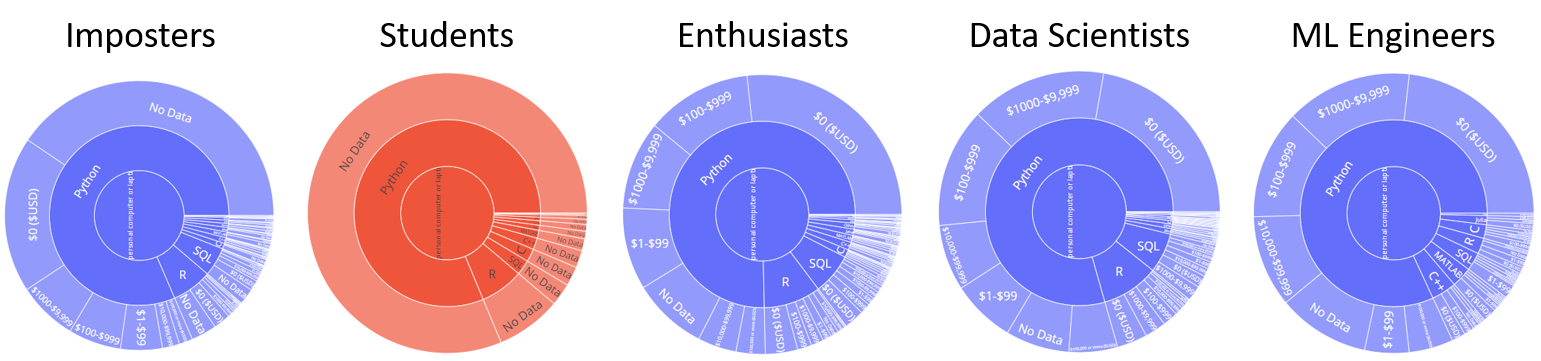
From this analysis it is easy to see that most of the Kagglers with Master's Degree use personal laptop for ML projects and main programming language is Python.

<a>Data Imposters: </a> 60-70% aren't spending money on spcialized courses.

<a>Students:</a> No data available for courses spending and looks like the programming language proportion is respected.

<a>Data Enthusiasts:</a> 25% not spending money on courses and 25% are spending. Main programming languages are Python, R and SQL. SQL prove the right segmentation for the Data Enthusiasts.

<a>Data Scientist:</a> 40% spend money on courses and they also work with SQL (might be transitional).

<a>ML Engineers:</a> They are not using R and SQL, which speak about focus on algorithms and model implementation focus.

Same as this example, you can click/select other interested dimensions and analyze them.


# **Age**

<a>“ Age isn't how old you are but how old you feel. Age appears to be best in four things. Old wood best to burn, old wine to drink, old friends to trust, and old authors to read. Middle age is youth without levity, and age without decay.”</a> [source](https://www.wisesayings.com/age-quotes/)

Age breakdown by countries. Please interact with the charts and menu.

In [ ]:
multi_plot(age_bar,"Age")
#Age breakdown by Segment
age_facet=survey[["Segm", "Q1","Resp"]]
age_facet=age_facet.groupby(["Segm", "Q1"])["Resp"].sum().reset_index()
age_facet.columns=["Segment", "Age", "Respondents"]
fig = px.bar(age_facet, x="Age", y="Respondents", text="Respondents",
            color="Respondents", title = "Age - Segmentation Breakdown", facet_col_wrap=3, height=800,
            # barmode="group",
            # facet_row="time", 
             facet_col="Segment")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# **Experience**

<a>“ The only source of knowledge is experience.”</a> Albert Einstein

From the other side most of the companies value at least 3 years of experince.

In [ ]:
multi_plot(exp_bar,"Experience")
#Experience breakdown by Segment
exp_facet=survey[["Segm", "Q6","Resp"]]
exp_facet=exp_facet.groupby(["Segm", "Q6"])["Resp"].sum().reset_index()
exp_facet.columns=["Segment", "Experience", "Respondents"]
fig = px.bar(exp_facet, x="Experience", y="Respondents", text="Respondents",
            color="Respondents", title = "Experience - Segmentation Breakdown", facet_col_wrap=3, height=800,
            # barmode="group",
            # facet_row="time", 
             facet_col="Segment")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# **Level of Formal Education**

<a>“Anyone who has never made a mistake has never tried anything new”</a> Albert Einstein

If you want to lead a happy life and enjoy the good things the world has to offer, you certainly need to get educated. A great job, a good social reputation are few of the many benefits of being an educated person. Education is a must for a promising and secure future and a stable life.

Please interact with the menu.

In [ ]:
multi_plot(edu_bar,"Education")
#Education breakdown by Segment
edu_facet=survey[["Segm", "Q4","Resp"]]
edu_facet=edu_facet.groupby(["Segm", "Q4"])["Resp"].sum().reset_index()
edu_facet.columns=["Segment", "Education Level", "Respondents"]
fig = px.bar(edu_facet, x="Education Level", y="Respondents", text="Respondents",
            color="Respondents", title = "Education Level - Segmentation Breakdown", facet_col_wrap=3, height=800,
            # barmode="group",
            # facet_row="time", 
             facet_col="Segment")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Programming Langage
<a> “Any fool can write code that a computer can understand. Good programmers write code that humans can understand.”</a> – Martin Fowler

In [ ]:
#Programming Languages
question=survey[['Segm','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12',	'Q7_OTHER']]
question.columns=['Segm','Python' ,'R','SQL' ,'C' ,'C++' ,'Java' ,'Javascript' ,'Julia' ,'Swift' ,'Bash' ,'MATLAB' ,'None' ,'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Programming Languages", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Hosted Notebooks
<a> “Optimism is an occupational hazard of programming: feedback is the treatment. “</a> – Kent Beck

In [ ]:
#Hosted Notebooks
question=survey[['Segm','Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5','Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10','Q10_Part_11','Q10_Part_12',	'Q10_Part_13',	'Q10_OTHER']]
question.columns=['Segm','Kaggle Notebooks','Colab Notebooks','Azure Notebooks',	'Paperspace / Gradient','Binder / JupyterHub','Code Ocean','IBM Watson Studio','Amazon Sagemaker Studio','Amazon EMR Notebooks','Google Cloud AI Platform Notebooks','Google Cloud Datalab Notebooks','Databricks Collaborative Notebooks','None','Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Hosted Notebooks", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Specialized Harware
<a> “Before software can be reusable it first has to be usable.”</a> – Ralph Johnson

In [ ]:
#Specialized Harware
question=survey[['Segm','Q12_Part_1',	'Q12_Part_2',	'Q12_Part_3',	'Q12_OTHER']]
question.columns=['Segm','GPUs',	'TPUs',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Specialized Harware", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(showticklabels=True)
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Visualization Libraries
<a> "The inadequacy of uni-dimensional plotting along a continuum (in this case the diagonal of a symmetric matrix) inevitably would make “buffer” elements appear non-conformist when in fact they may be part of an interconnected pattern."</a> –  Jennifer K. McArthur

In [ ]:
#Visualization Libraries
question=survey[['Segm','Q14_Part_1',	'Q14_Part_2',	'Q14_Part_3',	'Q14_Part_4',	'Q14_Part_5',	'Q14_Part_6',	'Q14_Part_7',	'Q14_Part_8',	'Q14_Part_9',	'Q14_Part_10',	'Q14_Part_11',	'Q14_OTHER']]
question.columns=['Segm','Matplotlib',	'Seaborn',	'Plotly / Plotly Express',	'Ggplot / ggplot2',	'Shiny',	'D3.js',	'Altair',	'Bokeh',	'Geoplotlib',	'Leaflet / Folium',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Visualization Libraries", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1200,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Machine Learnning Frameworks
<a> “Artificial Intelligence, deep learning, machine learning — whatever you’re doing if you don’t understand it — learn it. Because otherwise you’re going to be a dinosaur within 3 years.”</a> – Mark Cuban

In [ ]:
#Machine Learnning Frameworks
question=survey[['Segm','Q16_Part_1',	'Q16_Part_2',	'Q16_Part_3',	'Q16_Part_4',	'Q16_Part_5',	'Q16_Part_6',	'Q16_Part_7',	'Q16_Part_8',	'Q16_Part_9',	'Q16_Part_10',	'Q16_Part_11',	'Q16_Part_12',	'Q16_Part_13',	'Q16_Part_14',	'Q16_Part_15',	'Q16_OTHER']]
question.columns=['Segm','Scikit-learn',	'TensorFlow',	'Keras',	'PyTorch',	'Fast.ai',	'MXNet',	'Xgboost',	'LightGBM',	'CatBoost',	'Prophet',	'H20-3',	'Caret',	'Tidymodels',	'JAX',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Machine Learnning Frameworks", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Machine Learnning Algorithms
<a> “We are entering a new world. The technologies of machine learning, speech recognition, and natural language understanding are reaching a nexus of capability. The end result is that we’ll soon have artificially intelligent assistants to help us in every aspect of our lives.”</a> – Amy Stapleton

In [ ]:
#Machine Learnning Algorithms
question=survey[['Segm','Q17_Part_1',	'Q17_Part_2',	'Q17_Part_3',	'Q17_Part_4',	'Q17_Part_5',	'Q17_Part_6',	'Q17_Part_7',	'Q17_Part_8',	'Q17_Part_9',	'Q17_Part_10',	'Q17_Part_11',	'Q17_OTHER']]
question.columns=['Segm','Linear or Logistic Regression',	'Decision Trees or Random Forests',	'Gradient Boosting Machines (xgboost, lightgbm, etc)',	'Bayesian Approaches',	'Evolutionary Approaches',	'Dense Neural Networks (MLPs, etc)',	'Convolutional Neural Networks',	'Generative Adversarial Networks',	'Recurrent Neural Networks',	'Transformer Networks (BERT, gpt-3, etc)',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Machine Learnning Algorithms", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1200,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Computer Vision
<a> "If you're using a computer as an artist and expressing your personal vision, I think your personal vision comes through." </a> – Dave Gibbson

In [ ]:
#Computer Vision
question=survey[['Segm','Q18_Part_1',	'Q18_Part_2',	'Q18_Part_3',	'Q18_Part_4',	'Q18_Part_5',	'Q18_Part_6',	'Q18_OTHER']]
question.columns=['Segm','General purpose image/video tools (PIL, cv2, skimage, etc)',	'Image segmentation methods (U-Net, Mask R-CNN, etc)',	'Object detection methods (YOLOv3, RetinaNet, etc)',	'Image classification (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',	'Generative Networks (GAN, VAE, etc)',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Computer Vision", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# NLP - Neuro Linguistic Programming
<a> “Neuro-linguistic programming is to Neuroscience what Astrology is to Astronomy.”</a> – Abhijit Naskar

In [ ]:
#NLP - Neuro Linguistic Programming
question=survey[['Segm','Q19_Part_1',	'Q19_Part_2',	'Q19_Part_3',	'Q19_Part_4',	'Q19_Part_5',	'Q19_OTHER']]
question.columns=['Segm','Word embeddings/vectors (GLoVe, fastText, word2vec)',	'Encoder-decoder models (seq2seq, vanilla transformers)',	'Contextualized embeddings (ELMo, CoVe)',	'Transformer language models (GPT-3, BERT, XLnet, etc)',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "NLP - Neuro Linguistic Programming", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Activities at work
<a> "Intelligence is the ability to adapt to change." </a> – Kent Beck

In [ ]:
#Activities at work
question=survey[['Segm','Q23_Part_1',	'Q23_Part_2',	'Q23_Part_3',	'Q23_Part_4',	'Q23_Part_5',	'Q23_Part_6',	'Q23_Part_7',	'Q23_OTHER']]
question=question[question['Segm'] !='Student']
question.columns=['Segm','Analyze and understand data to influence product or business decisions',	'Build and/or run the data infrastructure',	'Build prototypes to explore applying ML to new areas',	'Build and/or run a ML service that operationally improves my product or workflows',	'Experimentation and iteration to improve existing ML models',	'Do research that advances the state of the art of machine learning',	'None of these activities are an important partk',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Activities at work", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

# Platforms to Learn Data Science
<a> “The biggest benefit of eLearning is the utter lack of pressure. Because you get to set your own schedule and study only when you have time, eLearning makes learning not something you have to get over with, but something you look forward to! From experience, you learn more when you enjoy the process.”</a> – Mark Hayes, Head of Marketing at Kintell

In [ ]:
#Platforms to Learn Data Science
question=survey[['Segm','Q37_Part_1',	'Q37_Part_2',	'Q37_Part_3',	'Q37_Part_4',	'Q37_Part_5',	'Q37_Part_6',	'Q37_Part_7',	'Q37_Part_8',	'Q37_Part_9',	'Q37_Part_10',	'Q37_Part_11',	'Q37_OTHER']]
question.columns=['Segm','Coursera',	'EdX',	'Kaggle Learn Courses',	'DataCamp',	'Fast.ai',	'Udacity',	'Udemy',	'LinkedIn Learning',	'Cloud-certification programs',	'University Courses',	'None',	'Other']
question=question.groupby(by=["Segm"]).count()
stacked=question.stack().reset_index()
stacked.columns=['Label', 'Answer', 'Respondents']
fig = px.bar(stacked, x="Answer", y="Respondents", text="Respondents",
            color="Respondents", title = "Platforms to Learn Data Science", facet_col_wrap=2, 
              facet_row_spacing=0.1, 
              facet_col_spacing=0.05, 
             height=1100,
             facet_col="Label")
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
fig.show()

[back to top](#table-of-contents)
<a id="section-four"></a>
# **Money Analysis**

<a>Employee Remuneration </a> refers to the reward or compensation given to the employees for their work performances. Remuneration provides basic attraction to a employee to perform job efficiently and effectively.

Remuneration leads to employee motivation. Salaries constitutes an important source of income for employees and determine their standard of living. Salaries effect the employees productivity and work performance. Thus the amount and method of remuneration are very important for both management and employees

In the following analysis we can analyze average salary and average age based on working position. 

Top 10 countries and “Other” compensation analysis. Hove or select Salary range to see the interaction on all countries.


In [ ]:
top10list=['India',	'United States of America',	'Other', 'Brazil', 'Japan',	'Russia', 'United Kingdom',	'Nigeria', 'China', 'Germany', 'Turkey']
sal=survey[survey['Q24'] !='No Data']

sal=sal[sal["Q3"].isin(top10list)]
sal=sal[["Q3", "Q5", "Salary","Average Age","Resp"]]
sal=sal.groupby(['Q3',"Q5"]).agg({'Salary':'mean', 'Average Age':'mean','Resp':'sum'}).reset_index()
sal=sal.round({'Salary': 1, 'Average Age': 1})
fig = px.scatter(sal, x="Salary", y="Average Age", size="Resp", color="Q5",facet_col="Q3",facet_col_wrap=2,height=1200,
           hover_name="Q5",  size_max=40)
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
    fig.update_xaxes(showticklabels=True)
    fig.layout.showlegend = False
fig.show()

From this chart we can easily see Top 10 and Other countries and the relationship of Age vs Salary.<br>
The leading position is USA followed by UK. Hover on bubbles to check averages overall by country. <br>
Data Scientists are leading overall by number of respondents and salary. Average age of a Data Scientist in the USA is almost 38 y.o. and 142K dollars/year vs 36 y.o. and 90K dollars/year in UK. <br>
Also we cannot underestimate Product/Project Managers who are paid even better in most of the cases and play a huge role in the success of each team. <br>


# Compensation by Kaggle User Types

From our survey the most important hierarchical approach questions for compensation analysis will be:

<a> CURRENT ROLE > EXPERIENCE > COMPENSATION </a>

Here is the list of charts for this analysis. Click on specific measure one by one on each chart and see the differences.

In [ ]:
money=survey[["Segm", "Q5", "Q6","Q24","Resp"]]
money=money.groupby(["Segm", "Q5", "Q6","Q24"])["Resp"].sum().reset_index()
money.columns=["Segment", "Current Role", "Years Experience","Compensation","Resp"]
index_names = money[ money["Compensation"] == "No Data" ].index
money.drop(index_names, inplace = True) 

imposters_mo = money[(money["Segment"] == "Data Imposters")]
imposters_mo=imposters_mo.drop(columns=['Segment']).reset_index(drop=True)

enthusiast_mo=money[(money["Segment"] == "Data Enthusiasts")]
enthusiast_mo=enthusiast_mo.drop(columns=['Segment']).reset_index(drop=True)

student_mo=money[(money["Segment"] == "Student")]
student_mo=student_mo.drop(columns=['Segment']).reset_index(drop=True)

scientist_mo=money[(money["Segment"] ==  "Data Scientist")]
scientist_mo=scientist_mo.drop(columns=['Segment']).reset_index(drop=True)

machinel_mo=money[(money["Segment"] == "ML Engineer")]
machinel_mo=machinel_mo.drop(columns=['Segment']).reset_index(drop=True)

fig = px.sunburst(imposters_mo,
                  path=["Current Role", "Years Experience","Compensation"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Compensation Analysis for - Data Imposters (click on chart to interact) <br>Empty Data - excluded</b>" 
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()
fig = px.sunburst(enthusiast_mo,
                  path=["Current Role", "Years Experience","Compensation"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Compensation Analysis for - Data Enthusiasts (click on chart to interact) <br>Empty Data - excluded</b>" 
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()
fig = px.sunburst(scientist_mo,
                  path=["Current Role", "Years Experience","Compensation"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Compensation Analysis for - Data Scientists (click on chart to interact) <br>Empty Data - excluded</b>" 
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()
fig = px.sunburst(machinel_mo,
                  path=["Current Role", "Years Experience","Compensation"],
                  values='Resp',
                  branchvalues='total',
                  height=600,
                  title="<b>Compensation Analysis for - ML Engineers (click on chart to interact) <br>Empty Data - excluded</b>" 
                  )
fig.update_layout(
    font_size=12,
    title_font_color="black",
)
fig.show()

<u>Extended analysis for the charts above. </u><br>
Select on all 4 charts <a>20+ years </a><br>
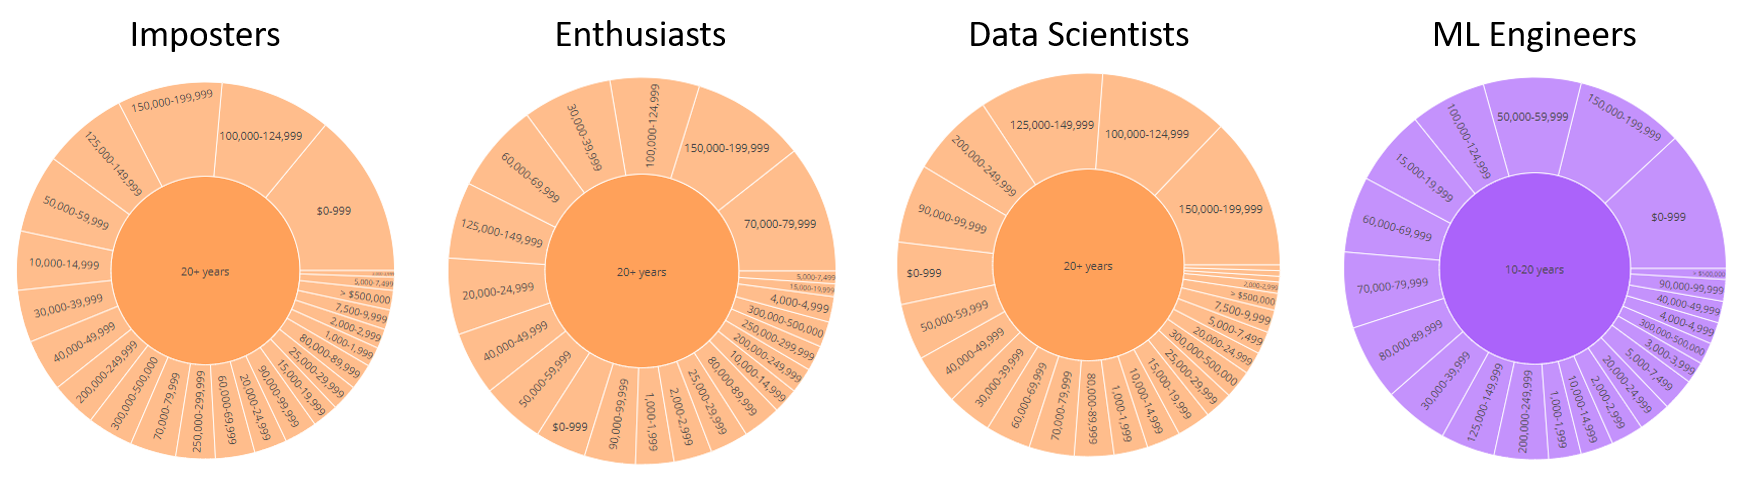
In the end you should get 4 selection like in the picture below. For the ML Engineers we do not have this breakdown so we will choose 10-20 years.<br>
<a>Data Imposters: </a> 25% have a salary more than 100K/year.<br>
<a>Data Enthusiasts:</a> 50% have a range of 60k-200k/year. Also, there are a lot of high paid ranges over 200k related to leadership positions like Project / Product Management.<br>
<a>Data Scientist:</a> 50% have a range of 90k-200k/year. This is the target profession aimed by most of the data people like Data Engineers, DB Analysts etc.<br>
<a>ML Engineers:</a> There are no experts with more than 20+ years of ML experience and most of them are highly paid. <br>
Same as this example, you can click/select other interested dimensions and analyze them.<br>


[back to top](#table-of-contents)
<a id="section-five"></a>
# Present and Future Technology Trends

In 2020 we’ll see a growing trend for applying recurrent neural networks for time series analysis and forecasting. 
Recurrent neural networks, which are an application of deep learning, are one reason we believe that deep learning will end up replacing traditional machine learning. 
For example, deep learning can forecast data, such as future exchange rates for currency with a surprisingly high degree of accuracy.

The research into time series classification has made substantial progress in recent years. The problem being solved is complex, offering both high dimensionality and large numbers. 
So far, no industry applications have been achieved. However, this is set to change as the research into this field has produced many promising results.


In [ ]:
q26a = {
    'Amazon Web Services (AWS)' : (survey['Q26_A_Part_1'].count()),
    'Microsoft Azure': (survey['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (survey['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (survey['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (survey['Q26_A_Part_5'].count()),
    'SAP Cloud' : (survey['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (survey['Q26_A_Part_7'].count()),
    'VMware Cloud' : (survey['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (survey['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (survey['Q26_A_Part_10'].count()),
    'None' : (survey['Q26_A_Part_11'].count()),
    'Other' : (survey['Q26_A_OTHER'].count())
}

q26b = {
    'Amazon Web Services (AWS)' : (survey['Q26_B_Part_1'].count()),
    'Microsoft Azure': (survey['Q26_B_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (survey['Q26_B_Part_3'].count()),
    'IBM Cloud / Red Hat' : (survey['Q26_B_Part_4'].count()),
    'Oracle Cloud' : (survey['Q26_B_Part_5'].count()),
    'SAP Cloud' : (survey['Q26_B_Part_6'].count()),
    'Salesforce Cloud' : (survey['Q26_B_Part_7'].count()),
    'VMware Cloud' : (survey['Q26_B_Part_8'].count()),
    'Alibaba Cloud' : (survey['Q26_B_Part_9'].count()),
    'Tencent Cloud' : (survey['Q26_B_Part_10'].count()),
    'None' : (survey['Q26_B_Part_11'].count()),
    'Other' : (survey['Q26_B_OTHER'].count())
}

q27a = {
    'Amazon EC2' : (survey['Q27_A_Part_1'].count()),
    'AWS Lambda': (survey['Q27_A_Part_2'].count()),
    'Amazon Elastic Container Service' : (survey['Q27_A_Part_3'].count()),
    'Azure Cloud Services' : (survey['Q27_A_Part_4'].count()),
    'Microsoft Azure Container Instances' : (survey['Q27_A_Part_5'].count()),
    'Azure Functions' : (survey['Q27_A_Part_6'].count()),
    'Google Cloud Compute Engine' : (survey['Q27_A_Part_7'].count()),
    'Google Cloud Functions' : (survey['Q27_A_Part_8'].count()),
    'Google Cloud Run' : (survey['Q27_A_Part_9'].count()),
    'Google Cloud App Engine' : (survey['Q27_A_Part_10'].count()),
    'No / None' : (survey['Q27_A_Part_11'].count()),
    'Other' : (survey['Q27_A_OTHER'].count())
}

q27b = {
    'Amazon EC2' : (survey['Q27_B_Part_1'].count()),
    'AWS Lambda': (survey['Q27_B_Part_2'].count()),
    'Amazon Elastic Container Service' : (survey['Q27_B_Part_3'].count()),
    'Azure Cloud Services' : (survey['Q27_B_Part_4'].count()),
    'Microsoft Azure Container Instances' : (survey['Q27_B_Part_5'].count()),
    'Azure Functions' : (survey['Q27_B_Part_6'].count()),
    'Google Cloud Compute Engine' : (survey['Q27_B_Part_7'].count()),
    'Google Cloud Functions' : (survey['Q27_B_Part_8'].count()),
    'Google Cloud Run' : (survey['Q27_B_Part_9'].count()),
    'Google Cloud App Engine' : (survey['Q27_B_Part_10'].count()),
    'No / None' : (survey['Q27_B_Part_11'].count()),
    'Other' : (survey['Q27_B_OTHER'].count())
}

q28a = {
    'Amazon SageMaker' : (survey['Q28_A_Part_1'].count()),
    'Amazon Forecast': (survey['Q28_A_Part_2'].count()),
    'Amazon Rekognition' : (survey['Q28_A_Part_3'].count()),
    'Azure Machine Learning Studio' : (survey['Q28_A_Part_4'].count()),
    'Azure Cognitive Services' : (survey['Q28_A_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (survey['Q28_A_Part_6'].count()),
    'Google Cloud Video AI' : (survey['Q28_A_Part_7'].count()),
    'Google Cloud Natural Language' : (survey['Q28_A_Part_8'].count()),
    'Google Cloud Vision AI' : (survey['Q28_A_Part_9'].count()),
    'No / None' : (survey['Q28_A_Part_10'].count()),
    'Other' : (survey['Q28_A_OTHER'].count())
}

q28b = {
    'Amazon SageMaker' : (survey['Q28_B_Part_1'].count()),
    'Amazon Forecast': (survey['Q28_B_Part_2'].count()),
    'Amazon Rekognition' : (survey['Q28_B_Part_3'].count()),
    'Azure Machine Learning Studio' : (survey['Q28_B_Part_4'].count()),
    'Azure Cognitive Services' : (survey['Q28_B_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (survey['Q28_B_Part_6'].count()),
    'Google Cloud Video AI' : (survey['Q28_B_Part_7'].count()),
    'Google Cloud Natural Language' : (survey['Q28_B_Part_8'].count()),
    'Google Cloud Vision AI' : (survey['Q28_B_Part_9'].count()),
    'No / None' : (survey['Q28_B_Part_10'].count()),
    'Other' : (survey['Q28_B_OTHER'].count())
}


q29a = {
    'MySQL' : (survey['Q29_A_Part_1'].count()),
    'PostgreSQL': (survey['Q29_A_Part_2'].count()),
    'SQLite' : (survey['Q29_A_Part_3'].count()),
    'Oracle Database' : (survey['Q29_A_Part_4'].count()),
    'MongoDB' : (survey['Q29_A_Part_5'].count()),
    'Snowflake' : (survey['Q29_A_Part_6'].count()),
    'IBM Db2' : (survey['Q29_A_Part_7'].count()),
    'Microsoft SQL Server' : (survey['Q29_A_Part_8'].count()),
    'Microsoft Access' : (survey['Q29_A_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (survey['Q29_A_Part_10'].count()),
    'Amazon Redshift' : (survey['Q29_A_Part_11'].count()),
    'Amazon Athena' : (survey['Q29_A_Part_12'].count()),
    'Amazon DynamoDB' : (survey['Q29_A_Part_13'].count()),
    'Google Cloud BigQuery' : (survey['Q29_A_Part_14'].count()),
    'Google Cloud SQL' : (survey['Q29_A_Part_15'].count()),
    'Google Cloud Firestore' : (survey['Q29_A_Part_16'].count()),
    'None' : (survey['Q29_A_Part_17'].count()),
    'Other' : (survey['Q29_A_OTHER'].count())
}


q29b = {
    'MySQL' : (survey['Q29_B_Part_1'].count()),
    'PostgreSQL': (survey['Q29_B_Part_2'].count()),
    'SQLite' : (survey['Q29_B_Part_3'].count()),
    'Oracle Database' : (survey['Q29_B_Part_4'].count()),
    'MongoDB' : (survey['Q29_B_Part_5'].count()),
    'Snowflake' : (survey['Q29_B_Part_6'].count()),
    'IBM Db2' : (survey['Q29_B_Part_7'].count()),
    'Microsoft SQL Server' : (survey['Q29_B_Part_8'].count()),
    'Microsoft Access' : (survey['Q29_B_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (survey['Q29_B_Part_10'].count()),
    'Amazon Redshift' : (survey['Q29_B_Part_11'].count()),
    'Amazon Athena' : (survey['Q29_B_Part_12'].count()),
    'Amazon DynamoDB' : (survey['Q29_B_Part_13'].count()),
    'Google Cloud BigQuery' : (survey['Q29_B_Part_14'].count()),
    'Google Cloud SQL' : (survey['Q29_B_Part_15'].count()),
    'Google Cloud Firestore' : (survey['Q29_B_Part_16'].count()),
    'None' : (survey['Q29_B_Part_17'].count()),
    'Other' : (survey['Q29_B_OTHER'].count())
}

q31a = {
    'Amazon QuickSight' : (survey['Q31_A_Part_1'].count()),
    'Microsoft Power BI': (survey['Q31_A_Part_2'].count()),
    'Google Data Studio' : (survey['Q31_A_Part_3'].count()),
    'Looker' : (survey['Q31_A_Part_4'].count()),
    'Tableau' : (survey['Q31_A_Part_5'].count()),
    'Salesforce' : (survey['Q31_A_Part_6'].count()),
    'Einstein Analytics' : (survey['Q31_A_Part_7'].count()),
    'Qlik' : (survey['Q31_A_Part_8'].count()),
    'Domo' : (survey['Q31_A_Part_9'].count()),
    'TIBCO Spotfire' : (survey['Q31_A_Part_10'].count()),
    'Alteryx' : (survey['Q31_A_Part_11'].count()),
    'Sisense' : (survey['Q31_A_Part_12'].count()),
    'SAP Analytics Cloud' : (survey['Q31_A_Part_13'].count()),
    'None' : (survey['Q31_A_Part_14'].count()),
    'Other' : (survey['Q31_A_OTHER'].count())
}

q31b = {
    'Amazon QuickSight' : (survey['Q31_B_Part_1'].count()),
    'Microsoft Power BI': (survey['Q31_B_Part_2'].count()),
    'Google Data Studio' : (survey['Q31_B_Part_3'].count()),
    'Looker' : (survey['Q31_B_Part_4'].count()),
    'Tableau' : (survey['Q31_B_Part_5'].count()),
    'Salesforce' : (survey['Q31_B_Part_6'].count()),
    'Einstein Analytics' : (survey['Q31_B_Part_7'].count()),
    'Qlik' : (survey['Q31_B_Part_8'].count()),
    'Domo' : (survey['Q31_B_Part_9'].count()),
    'TIBCO Spotfire' : (survey['Q31_B_Part_10'].count()),
    'Alteryx' : (survey['Q31_B_Part_11'].count()),
    'Sisense' : (survey['Q31_B_Part_12'].count()),
    'SAP Analytics Cloud' : (survey['Q31_B_Part_13'].count()),
    'None' : (survey['Q31_B_Part_14'].count()),
    'Other' : (survey['Q31_B_OTHER'].count())
}

q33a = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (survey['Q33_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (survey['Q33_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (survey['Q33_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (survey['Q33_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (survey['Q33_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (survey['Q33_A_Part_6'].count()),
    'No / None' : (survey['Q33_A_Part_7'].count()),
    'Other' : (survey['Q33_A_OTHER'].count())
}

q33b = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (survey['Q33_B_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (survey['Q33_B_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (survey['Q33_B_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (survey['Q33_B_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (survey['Q33_B_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (survey['Q33_B_Part_6'].count()),
    'No / None' : (survey['Q33_B_Part_7'].count()),
    'Other' : (survey['Q33_B_OTHER'].count())
}

q34a = {
    'Google Cloud AutoML' : (survey['Q34_A_Part_1'].count()),
    'H20 Driverless AI': (survey['Q34_A_Part_2'].count()),
    'Databricks AutoML' : (survey['Q34_A_Part_3'].count()),
    'DataRobot AutoML' : (survey['Q34_A_Part_4'].count()),
    'Tpot' : (survey['Q34_A_Part_5'].count()),
    'Auto-Keras' : (survey['Q34_A_Part_6'].count()),
    'Auto-Sklearn' : (survey['Q34_A_Part_7'].count()),
    'Auto_ml' : (survey['Q34_A_Part_8'].count()),
    'Xcessiv' : (survey['Q34_A_Part_9'].count()),
    'MLbox' : (survey['Q34_A_Part_10'].count()),
    'No / None' : (survey['Q34_A_Part_11'].count()),
    'Other' : (survey['Q34_A_OTHER'].count())
}

q34b = {
    'Google Cloud AutoML' : (survey['Q34_B_Part_1'].count()),
    'H20 Driverless AI': (survey['Q34_B_Part_2'].count()),
    'Databricks AutoML' : (survey['Q34_B_Part_3'].count()),
    'DataRobot AutoML' : (survey['Q34_B_Part_4'].count()),
    'Tpot' : (survey['Q34_B_Part_5'].count()),
    'Auto-Keras' : (survey['Q34_B_Part_6'].count()),
    'Auto-Sklearn' : (survey['Q34_B_Part_7'].count()),
    'Auto_ml' : (survey['Q34_B_Part_8'].count()),
    'Xcessiv' : (survey['Q34_B_Part_9'].count()),
    'MLbox' : (survey['Q34_B_Part_10'].count()),
    'No / None' : (survey['Q34_B_Part_11'].count()),
    'Other' : (survey['Q34_B_OTHER'].count())
}


q35a = {
    'Neptune.ai' : (survey['Q35_A_Part_1'].count()),
    'Weights & Biases': (survey['Q35_A_Part_2'].count()),
    'Comet.ml' : (survey['Q35_A_Part_3'].count()),
    'Sacred + Omniboard' : (survey['Q35_A_Part_4'].count()),
    'TensorBoard' : (survey['Q35_A_Part_5'].count()),
    'Guild.ai' : (survey['Q35_A_Part_6'].count()),
    'Polyaxon' : (survey['Q35_A_Part_7'].count()),
    'Trains' : (survey['Q35_A_Part_8'].count()),
    'Domino Model Monitor' : (survey['Q35_A_Part_9'].count()),
    'No / None' : (survey['Q35_A_Part_10'].count()),
    'Other' : (survey['Q35_A_OTHER'].count())
}


q35b = {
    'Neptune.ai' : (survey['Q35_B_Part_1'].count()),
    'Weights & Biases': (survey['Q35_B_Part_2'].count()),
    'Comet.ml' : (survey['Q35_B_Part_3'].count()),
    'Sacred + Omniboard' : (survey['Q35_B_Part_4'].count()),
    'TensorBoard' : (survey['Q35_B_Part_5'].count()),
    'Guild.ai' : (survey['Q35_B_Part_6'].count()),
    'Polyaxon' : (survey['Q35_B_Part_7'].count()),
    'Trains' : (survey['Q35_B_Part_8'].count()),
    'Domino Model Monitor' : (survey['Q35_B_Part_9'].count()),
    'No / None' : (survey['Q35_B_Part_10'].count()),
    'Other' : (survey['Q35_B_OTHER'].count())
}
#del list
df_q26a = pd.DataFrame(list(q26a.items()),columns = ['Answer','Responses'])
df_q26b = pd.DataFrame(list(q26b.items()),columns = ['Answer','Responses'])
df_q27a=pd.DataFrame(list(q27a.items()),columns = ['Answer','Responses'])
df_q27b=pd.DataFrame(list(q27b.items()),columns = ['Answer','Responses'])
df_q28a=pd.DataFrame(list(q28a.items()),columns = ['Answer','Responses'])
df_q28b=pd.DataFrame(list(q28b.items()),columns = ['Answer','Responses'])
df_q29a=pd.DataFrame(list(q29a.items()),columns = ['Answer','Responses'])
df_q29b=pd.DataFrame(list(q29b.items()),columns = ['Answer','Responses'])
df_q31a=pd.DataFrame(list(q31a.items()),columns = ['Answer','Responses'])
df_q31b=pd.DataFrame(list(q31b.items()),columns = ['Answer','Responses'])
df_q33a=pd.DataFrame(list(q33a.items()),columns = ['Answer','Responses'])
df_q33b=pd.DataFrame(list(q33b.items()),columns = ['Answer','Responses'])
df_q34a=pd.DataFrame(list(q34a.items()),columns = ['Answer','Responses'])
df_q34b=pd.DataFrame(list(q34b.items()),columns = ['Answer','Responses'])
df_q35a=pd.DataFrame(list(q35a.items()),columns = ['Answer','Responses'])
df_q35b=pd.DataFrame(list(q35b.items()),columns = ['Answer','Responses'])



# Q26 Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q26a['Answer'],
    y=df_q26a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q26b['Answer'],
    y=df_q26b['Responses'],
    text=df_q26b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="Which of the following cloud computing platforms do you hope to become more <br> familiar with in the next 2 years?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q27 In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q27a['Answer'],
    y=df_q27a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q27b['Answer'],
    y=df_q27b['Responses'],
    text=df_q27b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="In the next 2 years, do you hope to become more familiar with any of these specific <br> cloud computing products?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q28 In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q28a['Answer'],
    y=df_q28a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q28b['Answer'],
    y=df_q28b['Responses'],
    text=df_q28b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="In the next 2 years, do you hope to become more familiar with any of these specific <br> machine learning products?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q29 Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q29a['Answer'],
    y=df_q29a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q29b['Answer'],
    y=df_q29b['Responses'],
    text=df_q29b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="Which of the following big data products (relational databases, data warehouses,<br> data lakes, or similar) do you hope to become more familiar with in the next 2 years?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q31 Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? 

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q31a['Answer'],
    y=df_q31a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q31b['Answer'],
    y=df_q31b['Responses'],
    text=df_q31b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="Which of the following business intelligence tools do you hope to become <br> more familiar with in the next 2 years? ",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q33 Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q33a['Answer'],
    y=df_q33a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q33b['Answer'],
    y=df_q33b['Responses'],
    text=df_q33b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="Which categories of automated machine learning tools (or partial AutoML tools)<br> do you hope to become more familiar with in the next 2 years?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q34 Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q34a['Answer'],
    y=df_q34a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q34b['Answer'],
    y=df_q34b['Responses'],
    text=df_q34b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="Which specific automated machine learning tools (or partial AutoML tools) <br>do you hope to become more familiar with in the next 2 years?",
    barmode='group', xaxis_tickangle=-45)
fig.show()

#q35 In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_q35a['Answer'],
    y=df_q35a['Responses'],
    name='Present',
    marker_color='LightSlateGray'
))
fig.add_trace(go.Bar(
    x=df_q35b['Answer'],
    y=df_q35b['Responses'],
    text=df_q35b['Responses'],
    textposition='inside',
    name='Future',
    marker_color='LightSeaGreen'
))
fig.update_layout(
    title="In the next 2 years, do you hope to become more familiar with any of these tools <br>for managing ML experiments?",
    barmode='group', xaxis_tickangle=-45)
fig.show()


[back to top](#table-of-contents)
<a id="section-six"></a>
# **SUMMARY**

   During the recent 2020 global urgency, scientists, clinicians, and healthcare experts around the globe keep on searching for a new technology to support in tackling the Covid-19 pandemic. The Machine Learning (ML) and Artificial Intelligence (AI) application on the previous epidemic encourage researchers by giving a new angle to fight against the novel Coronavirus outbreak. <br>
Kaggle Survey 2020 show especially useful information about the behaviour of the main Key Kaggle Players. <br>
We can see a huge trend in pursuing a career in Data Science and Machine Learning Engineering as a global trend. The focus is to learn more, keeping current working position and finding a better paid job. <br>
There is an increase need for visualization tools and AutoML tools, which will lead to a faster and flexible solution. <br>
Stay safe and have a great learning journey. <br>

# References & Acknowledgement

* Key Players Images: <a href="http://www.behance.net">Behance.net</a>
* [2020 Kaggle Data Science & Machine Learning Survey](https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey) by Paul Mooney
* [Python Plotly Dropdown Demo](https://www.kaggle.com/benhamner/python-plotly-dropdown-demo) by Ben Hamner
* [Plotly Express in Python](https://plotly.com/python/plotly-express/)